<a href="https://colab.research.google.com/github/purvakurtkoti/ML/blob/main/Final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement: 
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. 

**DATA DESCRIPTION : **


* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: indicates likelihood of diabetes based on family history.
* Age: Age (years)
* Outcome: Class variable (0 or 1)





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/DataSets/diabetes-dataset.csv')

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [ ]:
data.size

18000

In [ ]:
data.shape

(2000, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00




* Look at min row : glucose, BP, skin thickness, insulin and BMI is 0 for few people, which does not make any sense.


In [ ]:
data['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64



*    dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.



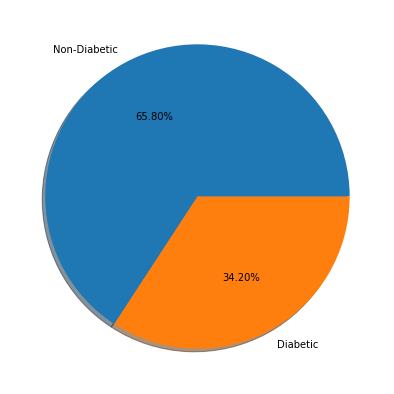

In [ ]:
plt.figure(figsize=(15,7))
plt.pie(data['Outcome'].value_counts(),autopct='%.2f%%',shadow=True,radius=1,labels=['Non-Diabetic','Diabetic'])
plt.show()

# Histogram

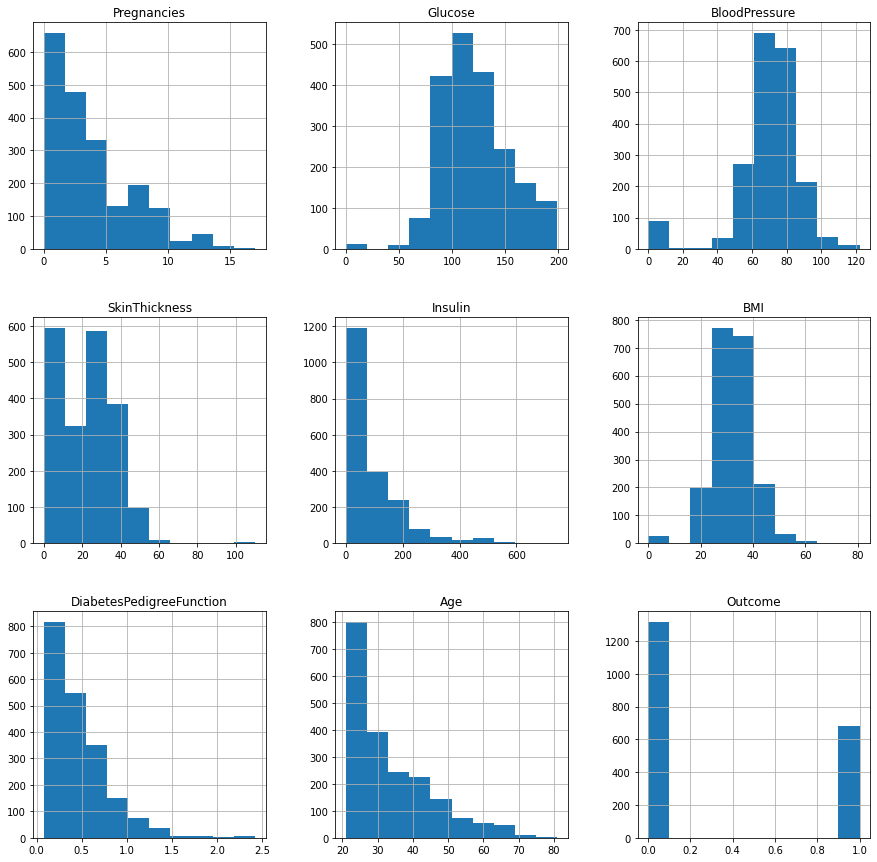

In [ ]:
data.hist(figsize = (15,15))
plt.show()

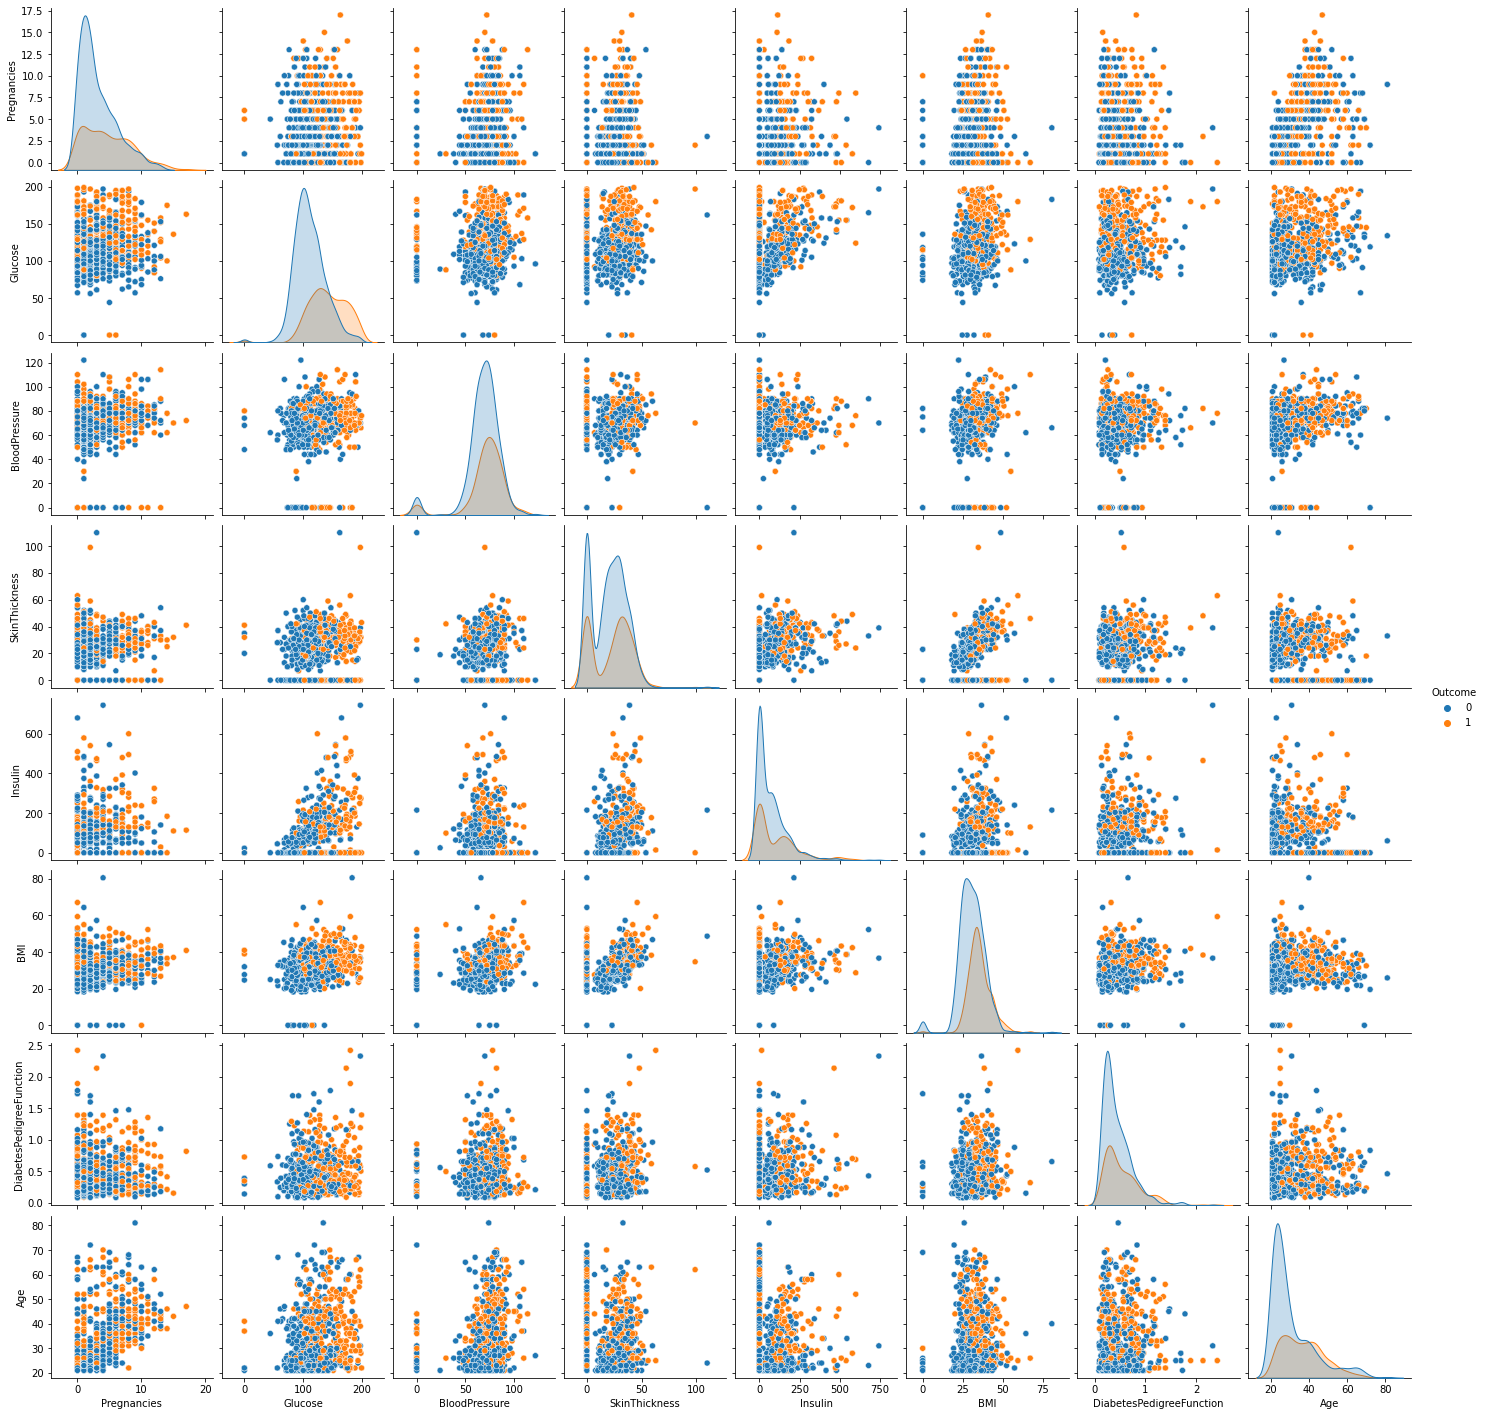

In [ ]:
sns.pairplot(data, hue ='Outcome')

## Checking for Outliers

Pregnancies                    AxesSubplot(0.125,0.657941;0.227941x0.222059)
Glucose                     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
BloodPressure               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
SkinThickness                  AxesSubplot(0.125,0.391471;0.227941x0.222059)
Insulin                     AxesSubplot(0.398529,0.391471;0.227941x0.222059)
BMI                         AxesSubplot(0.672059,0.391471;0.227941x0.222059)
DiabetesPedigreeFunction          AxesSubplot(0.125,0.125;0.227941x0.222059)
Age                            AxesSubplot(0.398529,0.125;0.227941x0.222059)
Outcome                        AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

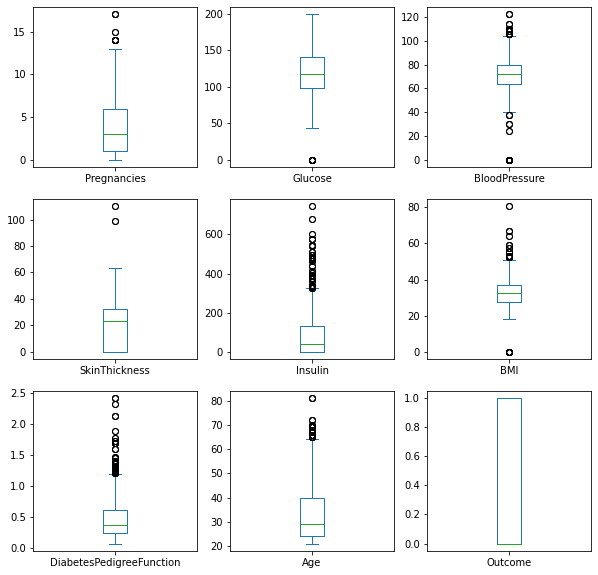

In [ ]:
data.plot(kind="box", subplots=True, layout=(3,3), figsize=(10,10))




* Dataset contains outlier



In [ ]:
# Checking how many people have 0 in glucose, BP, skin thickness, insulin and BMI by mean, median depending upon distribution

l=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [ ]:
data[l].isin([0]).sum()

Glucose           13
BloodPressure     90
SkinThickness    573
Insulin          956
BMI               28
dtype: int64

In [ ]:
# replacing 0 with mean for 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI'

data["Glucose"] = data["Glucose"].replace({ 0 : data["Glucose"].mean()})

data["BloodPressure"] = data["BloodPressure"].replace({ 0 : data["BloodPressure"].mean()})

data["SkinThickness"] = data["SkinThickness"].replace({ 0 : data["SkinThickness"].median()})

data["Insulin"] = data["Insulin"].replace({ 0 : data["Insulin"].median()})

data["BMI"] = data["BMI"].replace({ 0 : data["BMI"].median()})

In [ ]:
data[l].isin([0]).sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c2defd190>,
      dtype=object)

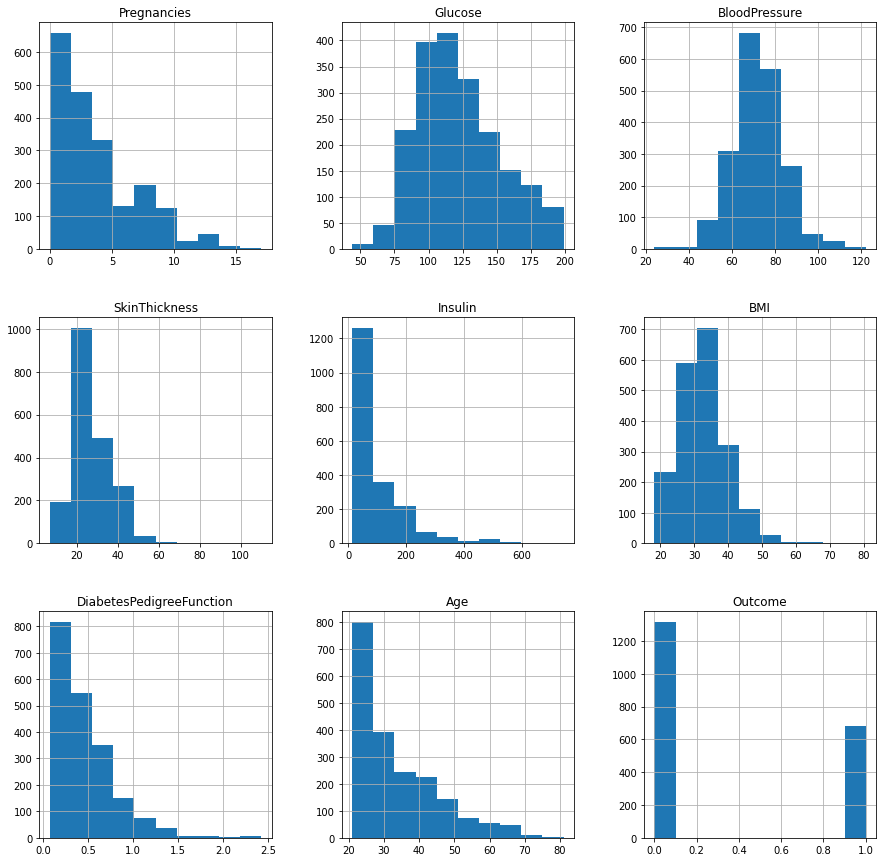

In [ ]:
# Plotting histogram of dataset after replacing 0 values

data.hist(figsize=(15,15))

In [ ]:
data['Outcome'].value_counts()

0    1316
1     684
Name: Outcome, dtype: int64



* 1316/2000 people are not diabetic
* 684/2000 are  diabetic



Text(0.5, 1.0, '% of Diabetic and Non-Diabetic patients ')

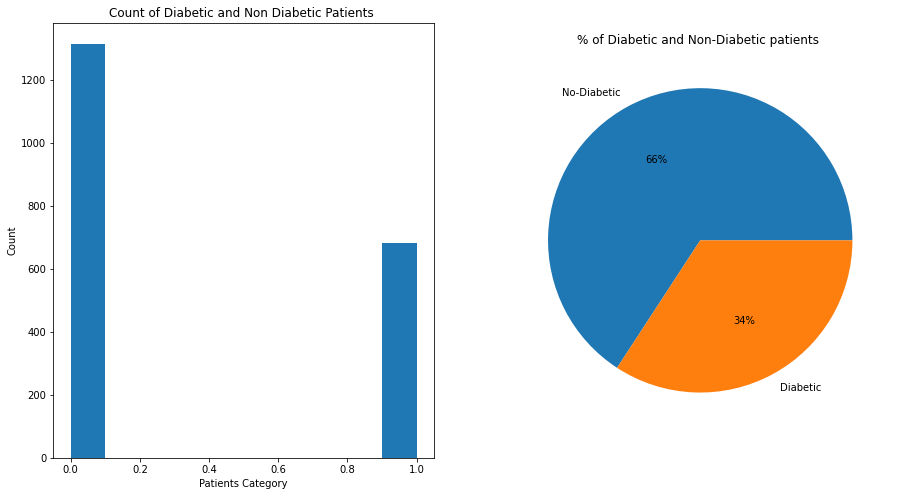

In [ ]:
o=data["Outcome"].value_counts()
l1 = ["No-Diabetic","Diabetic"]
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.hist(data["Outcome"])
plt.title("Count of Diabetic and Non Diabetic Patients ")
plt.xlabel("Patients Category")
plt.ylabel("Count")
plt.subplot(1,2,2)
plt.pie(o,labels =l1 ,autopct ='%1.0f%%')
plt.title("% of Diabetic and Non-Diabetic patients ")

In [ ]:
# diabetic patient data in d1 and non diabetic patient data in d2

d1=data[data["Outcome"]==1]

d2=data[data["Outcome"]==0]

## Detailed Statistics Of Diabetic Patients

In [ ]:
d1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0000,35.0,40.0,33.6,0.127,47,1
2,0,145.0,69.1455,23.0,40.0,44.2,0.630,31,1
3,0,135.0,68.0000,42.0,250.0,42.3,0.365,24,1
11,4,125.0,70.0000,18.0,122.0,28.9,1.144,45,1
16,7,195.0,70.0000,33.0,145.0,25.1,0.163,55,1
...,...,...,...,...,...,...,...,...,...
1986,6,104.0,74.0000,18.0,156.0,29.9,0.722,41,1
1991,6,102.0,82.0000,23.0,40.0,30.8,0.180,36,1
1992,6,134.0,70.0000,23.0,130.0,35.4,0.542,29,1
1996,8,179.0,72.0000,42.0,130.0,32.7,0.719,36,1


In [ ]:
d1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.0
mean,4.732456,142.631718,75.109173,29.929825,119.190058,35.462135,0.540681,36.956140,1.0
std,3.746358,29.193258,11.783154,9.703710,116.328845,6.770997,0.363689,10.924115,0.0
min,0.000000,80.000000,30.000000,7.000000,14.000000,20.100000,0.088000,21.000000,1.0
25%,1.000000,120.000000,68.000000,23.000000,40.000000,30.900000,0.261000,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,40.000000,34.300000,0.434000,36.000000,1.0
75%,7.000000,167.000000,82.000000,36.000000,167.000000,38.700000,0.727000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,600.000000,67.100000,2.420000,70.000000,1.0


## Detailed Statistics Of Non Diabetic **Patients**




In [ ]:
d2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0,84.0,82.0000,31.0,125.0,38.2,0.233,23,0
4,1,139.0,62.0000,41.0,480.0,40.7,0.536,21,0
5,0,173.0,78.0000,32.0,265.0,46.5,1.159,58,0
6,4,99.0,72.0000,17.0,40.0,25.6,0.294,28,0
7,8,194.0,80.0000,23.0,40.0,26.1,0.551,67,0
...,...,...,...,...,...,...,...,...,...
1993,2,87.0,69.1455,23.0,40.0,28.9,0.773,25,0
1994,1,79.0,60.0000,42.0,48.0,43.5,0.678,23,0
1995,2,75.0,64.0000,24.0,55.0,29.7,0.370,33,0
1997,6,85.0,78.0000,23.0,40.0,31.2,0.382,42,0


In [ ]:
d2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.0
mean,3.168693,111.231214,70.774636,26.274316,89.074468,31.181079,0.434676,31.081307,0.0
std,2.913526,25.240538,11.798903,9.249888,85.973135,6.964660,0.294268,11.721103,0.0
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.0
25%,1.000000,94.000000,62.000000,22.000000,40.000000,25.900000,0.234750,23.000000,0.0
50%,2.000000,107.000000,70.000000,23.000000,44.000000,30.600000,0.342000,26.000000,0.0
75%,5.000000,126.000000,78.000000,31.000000,106.000000,35.400000,0.571000,36.250000,0.0
max,13.000000,197.000000,122.000000,110.000000,744.000000,80.600000,2.329000,81.000000,0.0


##  Checking and segregating patient with their Sugar level


In [ ]:
# Checking and segregating patient with their Sugar level

s=(data[data["Glucose"]<=140]).value_counts().sum()
s1=(data[(data["Glucose"]>140) & (data["Glucose"]<=180)]).value_counts().sum()
s2=(data[data["Glucose"]>180]).value_counts().sum()

print("Number of people whose Glucose level is Good :",s)
print("Number of people whose Glucose level is Normal :",s1)
print("Number of people whose Glucose level is High :",s2)

Number of people whose Glucose level is Good : 1492
Number of people whose Glucose level is Normal : 403
Number of people whose Glucose level is High : 105


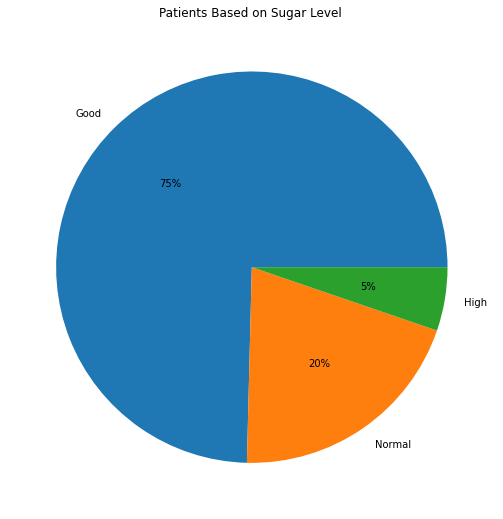

In [ ]:
plt.figure(figsize=(11,9))
y = np.array([s,s1,s2])
mylabels = ["Good", "Normal", "High"]
plt.title("Patients Based on Sugar Level ")
plt.pie(y, labels = mylabels, autopct='%.0f%%')
plt.show() 

In [ ]:
# Checking how many people have good glucose level but still have diabetes

a=data[data["Glucose"]<=140]
a_1=a[a["Outcome"]==1]
a_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0000,62.0,35.0,40.0,33.6,0.127,47,1
3,0,135.0000,68.0,42.0,250.0,42.3,0.365,24,1
11,4,125.0000,70.0,18.0,122.0,28.9,1.144,45,1
20,6,121.1825,68.0,41.0,40.0,39.0,0.727,41,1
28,12,84.0000,72.0,31.0,40.0,29.7,0.297,46,1
...,...,...,...,...,...,...,...,...,...
1985,0,131.0000,88.0,23.0,40.0,31.6,0.743,32,1
1986,6,104.0000,74.0,18.0,156.0,29.9,0.722,41,1
1991,6,102.0000,82.0,23.0,40.0,30.8,0.180,36,1
1992,6,134.0000,70.0,23.0,130.0,35.4,0.542,29,1


* 343/1492 People have good glucose level but still have diabetes


In [ ]:
# Checking how many people have normal glucose level but still have diabetes

a1=(data[(data["Glucose"]>140) & (data["Glucose"]<=180)])
a1_1=a1[a1["Outcome"]==1]
a1_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,0,145.0,69.1455,23.0,40.0,44.2,0.630,31,1
24,0,180.0,90.0000,26.0,90.0,36.5,0.314,35,1
33,3,163.0,70.0000,18.0,105.0,31.6,0.268,28,1
43,9,171.0,110.0000,24.0,240.0,45.4,0.721,54,1
45,0,180.0,66.0000,39.0,40.0,42.0,1.893,25,1
...,...,...,...,...,...,...,...,...,...
1953,3,170.0,64.0000,37.0,225.0,34.5,0.356,30,1
1973,9,156.0,86.0000,28.0,155.0,34.3,1.189,42,1
1976,7,152.0,88.0000,44.0,40.0,50.0,0.337,36,1
1980,17,163.0,72.0000,41.0,114.0,40.9,0.817,47,1



* 254/403 People have normal glucose level and have diabetes



In [ ]:
# Checking how many people have high glucose level and have diabetes

a2=data[data["Glucose"]>180]
a2_1=a2[a2["Outcome"]==1]
a2_1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
16,7,195.0,70.0,33.0,145.0,25.1,0.163,55,1
56,7,187.0,68.0,39.0,304.0,37.7,0.254,41,1
154,8,188.0,78.0,23.0,40.0,47.9,0.137,43,1
185,7,194.0,68.0,28.0,40.0,35.9,0.745,41,1
186,8,181.0,68.0,36.0,495.0,30.1,0.615,60,1
...,...,...,...,...,...,...,...,...,...
1836,3,187.0,70.0,22.0,200.0,36.4,0.408,36,1
1841,0,181.0,88.0,44.0,510.0,43.3,0.222,26,1
1847,6,190.0,92.0,23.0,40.0,35.5,0.278,66,1
1877,7,187.0,68.0,39.0,304.0,37.7,0.254,41,1


* 87/105 People have poor glucose level and have diabetes






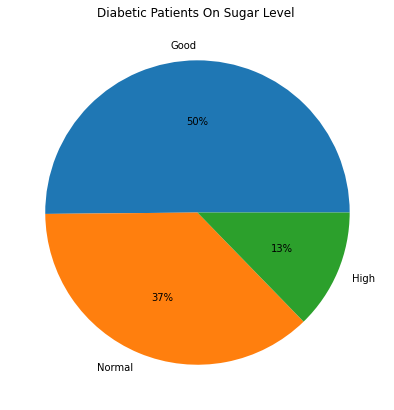

In [ ]:
plt.figure(figsize=(11,7))
y = np.array([len(a_1),len(a1_1),len(a2_1)])
mylabels = ["Good", "Normal", "High"]
plt.title("Diabetic Patients On Sugar Level ")
plt.pie(y, labels = mylabels, autopct='%.0f%%')
plt.show() 

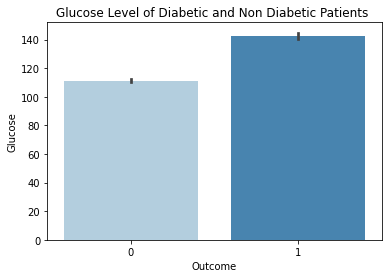

In [ ]:
plt.title("Glucose Level of Diabetic and Non Diabetic Patients ")
plt.xlabel("Patients Category")
plt.ylabel("Glucose")
sns.barplot(x = 'Outcome',y = 'Glucose',data = data,palette = "Blues") 

**Diabetic People have High Glucose level compared to Non Diabetic **



## Checking and segregating patient with their BP

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0000,35.0,40.0,33.6,0.127,47,1
1,0,84.0,82.0000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,69.1455,23.0,40.0,44.2,0.630,31,1
3,0,135.0,68.0000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0000,41.0,480.0,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0000,24.0,55.0,29.7,0.370,33,0
1996,8,179.0,72.0000,42.0,130.0,32.7,0.719,36,1
1997,6,85.0,78.0000,23.0,40.0,31.2,0.382,42,0
1998,0,129.0,110.0000,46.0,130.0,67.1,0.319,26,1


In [ ]:
data['BloodPressure'].unique()

array([ 62.    ,  82.    ,  69.1455,  68.    ,  78.    ,  72.    ,
        80.    ,  65.    ,  90.    ,  70.    ,  74.    ,  64.    ,
        60.    ,  50.    ,  54.    ,  76.    ,  84.    ,  92.    ,
       110.    ,  66.    ,  56.    ,  88.    ,  58.    ,  85.    ,
        86.    ,  75.    ,  48.    ,  44.    , 108.    ,  55.    ,
        96.    , 122.    ,  30.    ,  52.    ,  98.    , 104.    ,
        95.    ,  46.    , 102.    , 100.    ,  61.    ,  94.    ,
        24.    ,  38.    , 106.    , 114.    ,  40.    ])

In [ ]:
BP=(data[data["BloodPressure"]<=40]).value_counts().sum()
BP1=(data[(data["BloodPressure"]>40) & (data["BloodPressure"]<=80)]).value_counts().sum()
BP2=(data[data["BloodPressure"]>80]).value_counts().sum()

print("Number of people whose BloodPressure is Low :",BP)
print("Number of people whose BloodPressure is Normal :",BP1)
print("Number of people whose BloodPressure is High :",BP2)

Number of people whose BloodPressure is Low : 10
Number of people whose BloodPressure is Normal : 1565
Number of people whose BloodPressure is High : 425


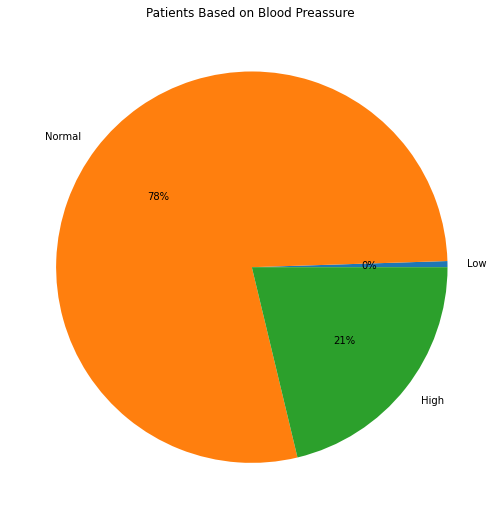

In [ ]:
plt.figure(figsize=(11,9))
y = np.array([BP,BP1,BP2])
mylabels = ["Low", "Normal", "High"]
plt.title("Patients Based on Blood Preassure ")
plt.pie(y, labels = mylabels, autopct='%.0f%%')
plt.show() 

In [ ]:
# Checking how many people have Low BloodPressure and have diabetes

b=data[data["BloodPressure"]<40]
b_2=b[b["Outcome"]==1]
b_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
125,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
1283,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1
1946,1,88.0,30.0,42.0,99.0,55.0,0.496,26,1




*   3/10 people have diabetes with low BP

In [ ]:
# Checking how many people have Normal BloodPressure and have diabetes

b1=(data[(data["BloodPressure"]>40) & (data["BloodPressure"]<=80)])
b1_2=b1[b1["Outcome"]==1]
b1_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0000,35.0,40.0,33.6,0.127,47,1
2,0,145.0,69.1455,23.0,40.0,44.2,0.630,31,1
3,0,135.0,68.0000,42.0,250.0,42.3,0.365,24,1
11,4,125.0,70.0000,18.0,122.0,28.9,1.144,45,1
16,7,195.0,70.0000,33.0,145.0,25.1,0.163,55,1
...,...,...,...,...,...,...,...,...,...
1975,8,188.0,78.0000,23.0,40.0,47.9,0.137,43,1
1980,17,163.0,72.0000,41.0,114.0,40.9,0.817,47,1
1986,6,104.0,74.0000,18.0,156.0,29.9,0.722,41,1
1992,6,134.0,70.0000,23.0,130.0,35.4,0.542,29,1




*   482/1565 people have diabetes with Normal BP


In [ ]:
# Checking how many people have high BloodPressure and have diabetes

b2=data[data["BloodPressure"]>80] 
b2_2=b2[b2["Outcome"]==1]
b2_2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
24,0,180.0,90.0,26.0,90.0,36.5,0.314,35,1
43,9,171.0,110.0,24.0,240.0,45.4,0.721,54,1
53,8,176.0,90.0,34.0,300.0,33.7,0.467,58,1
66,0,109.0,88.0,30.0,40.0,32.5,0.855,38,1
72,13,126.0,90.0,23.0,40.0,43.4,0.583,42,1
...,...,...,...,...,...,...,...,...,...
1973,9,156.0,86.0,28.0,155.0,34.3,1.189,42,1
1976,7,152.0,88.0,44.0,40.0,50.0,0.337,36,1
1985,0,131.0,88.0,23.0,40.0,31.6,0.743,32,1
1991,6,102.0,82.0,23.0,40.0,30.8,0.180,36,1




*   199/425 people have diabetes with high BP

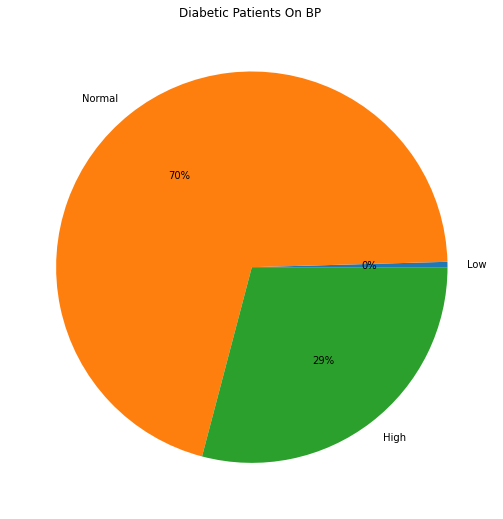

In [ ]:
plt.figure(figsize=(11,9))
y = np.array([len(b_2),len(b1_2),len(b2_2)])
mylabels = ["Low", "Normal", "High"]
plt.title("Diabetic Patients On BP ")
plt.pie(y, labels = mylabels, autopct='%.0f%%')
plt.show() 

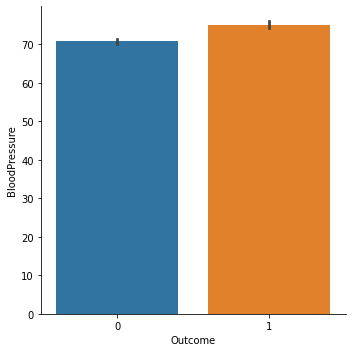

In [ ]:
sns.catplot(x="Outcome",y="BloodPressure",data=data, kind="bar")

The relation between Blood pressure and Diabetes is not showing any considerable information so we can not say blood pressure could be the factor

## SkinThickness, DiabetesPedigreeFunction, Age, Pregnancy

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0000,35.0,40.0,33.6,0.127,47,1
1,0,84.0,82.0000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,69.1455,23.0,40.0,44.2,0.630,31,1
3,0,135.0,68.0000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0000,41.0,480.0,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0000,24.0,55.0,29.7,0.370,33,0
1996,8,179.0,72.0000,42.0,130.0,32.7,0.719,36,1
1997,6,85.0,78.0000,23.0,40.0,31.2,0.382,42,0
1998,0,129.0,110.0000,46.0,130.0,67.1,0.319,26,1


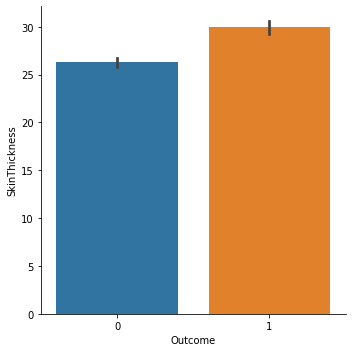

In [ ]:
sns.catplot(x="Outcome",y="SkinThickness",data=data,kind="bar")

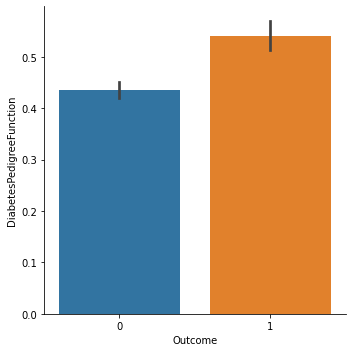

In [ ]:
sns.catplot(x="Outcome",y="DiabetesPedigreeFunction",data=data,kind="bar")




* People having DiabetesPedigreeFunction greater than 0.1 than there are chance that they can have diabetes or they are prone to diabetes in coming future  based on family history



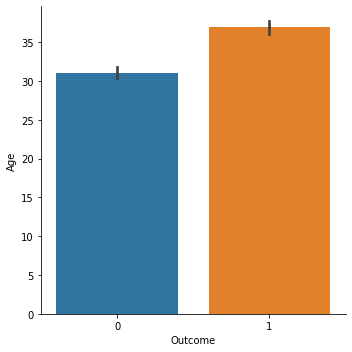

In [ ]:
sns.catplot(x="Outcome",y="Age",data=data,kind="bar")

*   Age is not impacting the diabetes





<Figure size 1080x864 with 0 Axes>

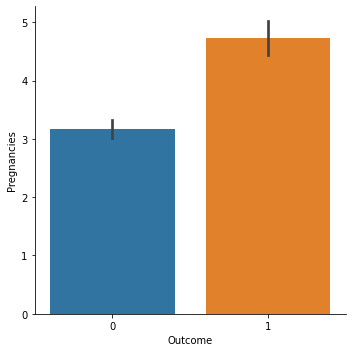

In [ ]:
plt.figure(figsize=(15,12))
sns.catplot(data=data,x='Outcome',y='Pregnancies',kind="bar")
plt.show()

* Chances of diabetes increases with increase in  pregnancy. 



## Checking and Segregating patient with their BMI

In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.0000,35.0,40.0,33.6,0.127,47,1
1,0,84.0,82.0000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,69.1455,23.0,40.0,44.2,0.630,31,1
3,0,135.0,68.0000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.0000,41.0,480.0,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.0000,24.0,55.0,29.7,0.370,33,0
1996,8,179.0,72.0000,42.0,130.0,32.7,0.719,36,1
1997,6,85.0,78.0000,23.0,40.0,31.2,0.382,42,0
1998,0,129.0,110.0000,46.0,130.0,67.1,0.319,26,1


In [ ]:
data['BMI'].unique()

array([33.6, 38.2, 44.2, 42.3, 40.7, 46.5, 25.6, 26.1, 36.8, 33.5, 32.8,
       28.9, 32.3, 26.6, 26. , 30.1, 25.1, 29.3, 25.2, 37.2, 39. , 33.3,
       37.3, 36.5, 28.6, 30.4, 25. , 29.7, 22.1, 24.2, 27.3, 31.6, 27.6,
       24. , 33.2, 32.9, 37.1, 34. , 40.2, 22.7, 45.4, 27.4, 42. , 28. ,
       39.1, 19.4, 24.4, 33.7, 34.7, 23. , 37.7, 46.8, 40.5, 41.5, 25.4,
       29. , 32.5, 42.7, 19.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4,
       24.6, 48.8, 32.4, 36.6, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4,
       28.7, 49.7, 22.5, 39.6, 29.5, 34.3, 37.4, 31.2, 30.5, 28.2, 23.2,
       53.2, 34.2, 26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8,
       36.9, 39.5, 21.9, 40.6, 47.9, 50. , 40.9, 29.9, 29.6, 31.9, 28.4,
       35.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 52.3,
       39.4, 24.3, 22.9, 34.8, 30.9, 31. , 40.1, 23.9, 37.5, 35.5, 42.8,
       42.6, 41.8, 35.8, 30. , 37.8, 34.6, 28.8, 23.6, 35.7, 36.7, 45.2,
       44. , 46.2, 35. , 43.6, 44.1, 18.4, 29.2, 27

In [ ]:
BMI_0=(data[data["BMI"]<=18]).value_counts().sum()
BMI_1=(data[(data["BMI"]>18) & (data["BMI"]<=24.9)]).value_counts().sum()
BMI_2=(data[(data["BMI"]>=25) & (data["BMI"]<=29.9)]).value_counts().sum()
BMI_3=(data[data["BMI"]<=30]).value_counts().sum()

print("Number of Under Weight people :",BMI_0)
print("Number of peoplehaving healthy Weight :",BMI_1)
print("Number of Over Weight people :",BMI_2)
print("Number of Obese people :",BMI_3)

Number of Under Weight people : 0
Number of peoplehaving healthy Weight : 265
Number of Over Weight people : 475
Number of Obese people : 756


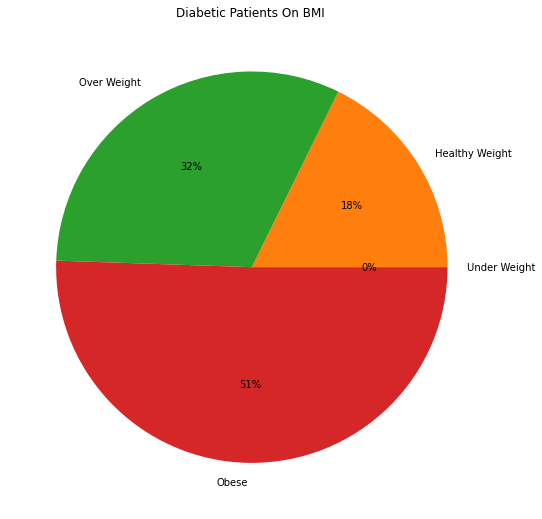

In [ ]:
plt.figure(figsize=(11,9))
y = np.array([(BMI_0),(BMI_1),(BMI_2),(BMI_3)])
mylabels = ["Under Weight", "Healthy Weight", "Over Weight", "Obese"]
plt.title("Diabetic Patients On BMI ")
plt.pie(y, labels = mylabels, autopct='%.0f%%')
plt.show() 

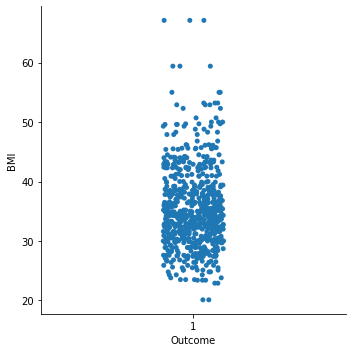

In [ ]:
sns.catplot(x="Outcome",y="BMI",data=d1)

* Mostly patients are obese thats why they are diabetic



In [ ]:
bmi1=(data[(data["BMI"]>18) & (data["BMI"]<=24.9)])
bmi1_3=bmi1[bmi1["Outcome"]==1]
bmi1_3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
93,4,134.0,72.0,23.0,40.0,23.8,0.277,60,1
197,3,107.0,62.0,13.0,48.0,22.9,0.678,23,1
319,6,194.0,78.0,23.0,40.0,23.5,0.129,59,1
646,1,167.0,74.0,17.0,144.0,23.4,0.447,33,1
676,9,156.0,86.0,23.0,40.0,24.8,0.230,53,1
749,6,162.0,62.0,23.0,40.0,24.3,0.178,50,1
789,6,194.0,78.0,23.0,40.0,23.5,0.129,59,1
1103,1,167.0,74.0,17.0,144.0,23.4,0.447,33,1
1133,9,156.0,86.0,23.0,40.0,24.8,0.230,53,1
1206,6,162.0,62.0,23.0,40.0,24.3,0.178,50,1


In [ ]:
len(bmi1_3[bmi1_3["Outcome"]==1])

18

* 18/265 people have diabetes who have Normal BMI   



In [ ]:
bmi2=(data[(data["BMI"]>=25) & (data["BMI"]<=29.9)])
bmi2_3=bmi2[bmi2["Outcome"]==1]
bmi2_3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
11,4,125.0,70.0,18.0,122.0,28.9,1.144,45,1
16,7,195.0,70.0,33.0,145.0,25.1,0.163,55,1
28,12,84.0,72.0,31.0,40.0,29.7,0.297,46,1
129,0,105.0,84.0,23.0,40.0,27.9,0.741,62,1
130,4,173.0,70.0,14.0,168.0,29.7,0.361,33,1
...,...,...,...,...,...,...,...,...,...
1818,3,130.0,78.0,23.0,79.0,28.4,0.323,34,1
1819,8,120.0,86.0,23.0,40.0,28.4,0.259,22,1
1950,0,105.0,84.0,23.0,40.0,27.9,0.741,62,1
1951,4,173.0,70.0,14.0,168.0,29.7,0.361,33,1


* 108/475 People have diabetes and over weight



In [ ]:
bmi3=data[(data["BMI"]>=30)]
bmi3_3=bmi3[bmi3["Outcome"]==1]
bmi3_3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0000,62.0000,35.0,40.0,33.6,0.127,47,1
2,0,145.0000,69.1455,23.0,40.0,44.2,0.630,31,1
3,0,135.0000,68.0000,42.0,250.0,42.3,0.365,24,1
20,6,121.1825,68.0000,41.0,40.0,39.0,0.727,41,1
24,0,180.0000,90.0000,26.0,90.0,36.5,0.314,35,1
...,...,...,...,...,...,...,...,...,...
1985,0,131.0000,88.0000,23.0,40.0,31.6,0.743,32,1
1991,6,102.0000,82.0000,23.0,40.0,30.8,0.180,36,1
1992,6,134.0000,70.0000,23.0,130.0,35.4,0.542,29,1
1996,8,179.0000,72.0000,42.0,130.0,32.7,0.719,36,1




* 558/756 People have diabetes and obese



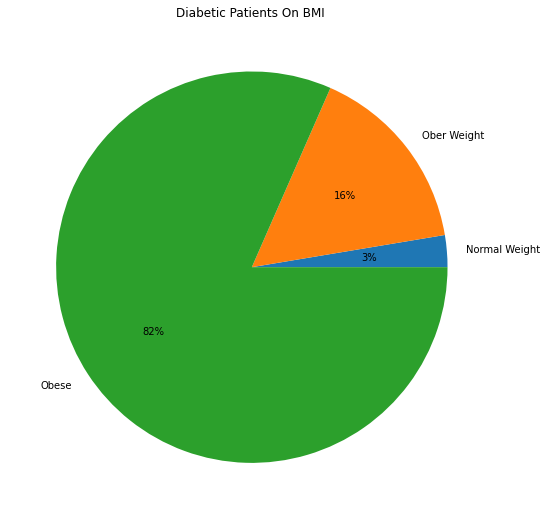

In [ ]:
plt.figure(figsize=(11,9))
y = np.array([len(bmi1_3),len(bmi2_3),len(bmi3_3)])
mylabels = ["Normal Weight", "Ober Weight", "Obese"]
plt.title("Diabetic Patients On BMI ")
plt.pie(y, labels = mylabels, autopct='%.0f%%')
plt.show() 

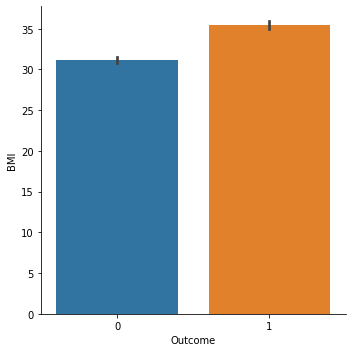

In [ ]:
sns.catplot(x="Outcome",y="BMI",data=data,kind="bar")




*  Diabetic patients are more over weight and obese as compare to non diabetic patients



##  Analyzing relationships between Variables

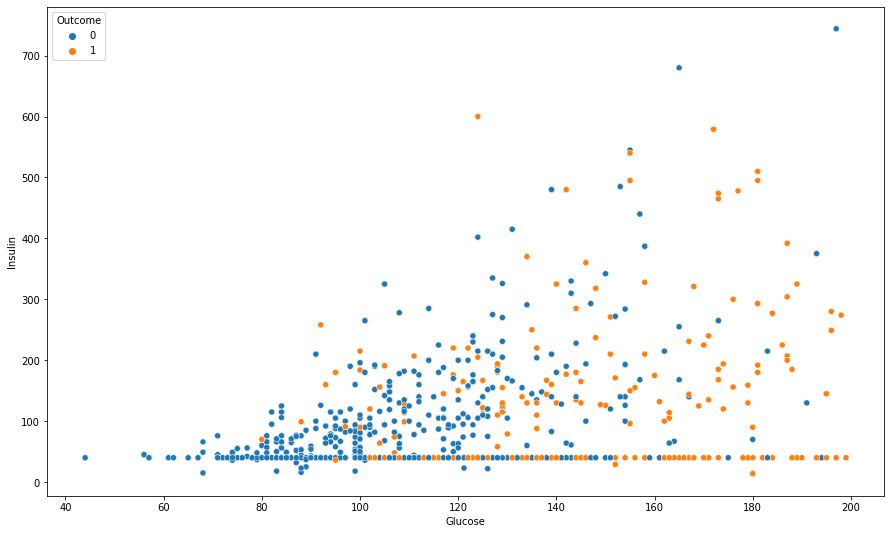

In [ ]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Glucose',y="Insulin",data=data,hue="Outcome")


* Glucose value(after 130) is increasing as insulin value increases in diabetic patients


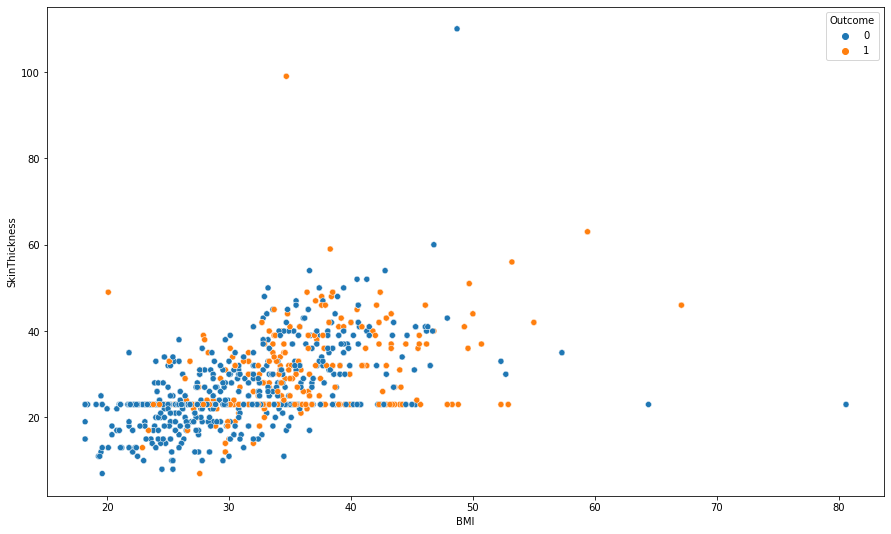

In [ ]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='BMI',y="SkinThickness",data=data,hue="Outcome")



*  Obese have more skin thickness

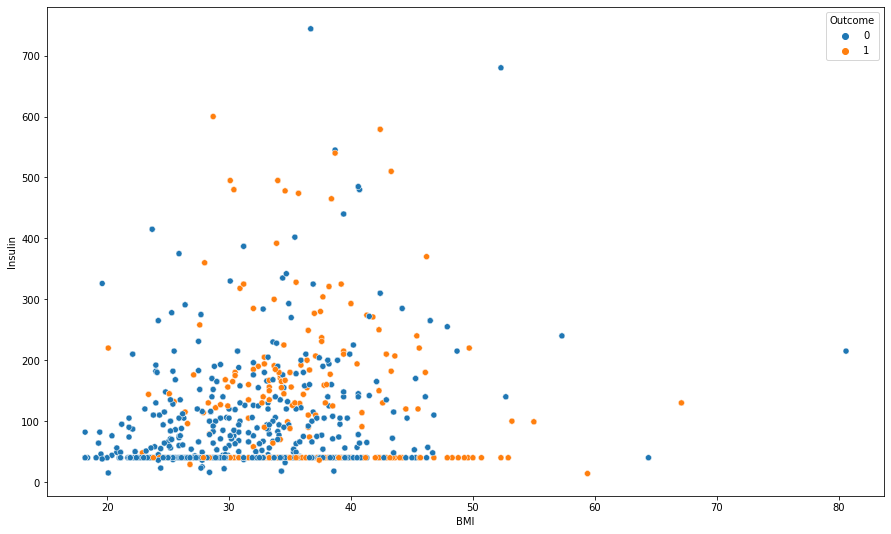

In [ ]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='BMI',y="Insulin",data=data,hue="Outcome")


* Those diabetic patients who are over weight and obese their insulin level is also high(greater than 150)



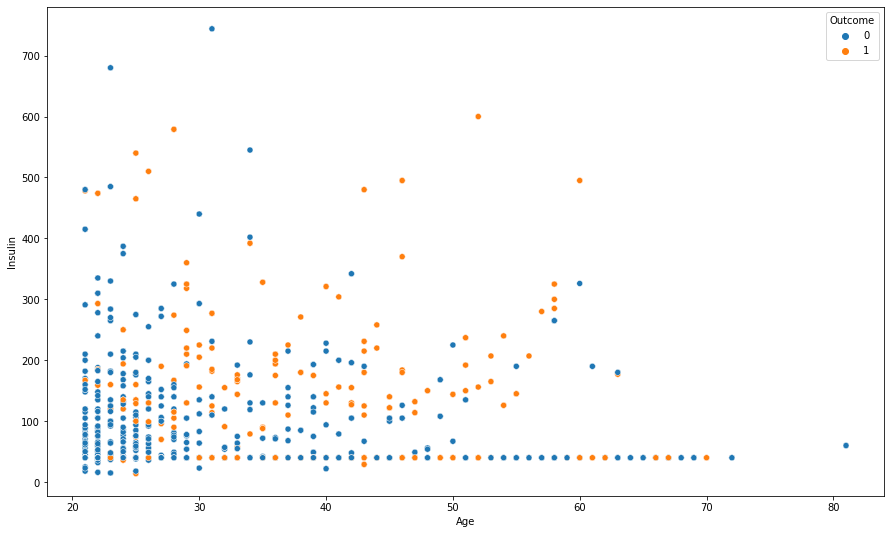

In [ ]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age',y="Insulin",data=data,hue="Outcome")

* After age 30 insulin level of patient increases which tends to lead diabetes 


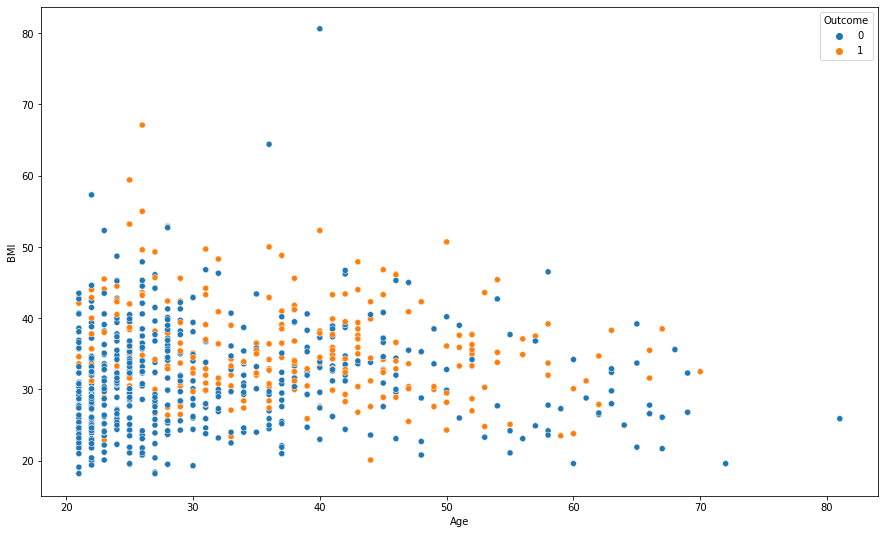

In [ ]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age',y="BMI",data=data,hue="Outcome")



*  Diabetic patient are obese and adults (greater than 30 )

# Correlation of each features in dataset

In [ ]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.121569,0.199471,0.042450,-0.052486,0.011404,-0.025453,0.539457,0.224437
Glucose,0.121569,1.000000,0.200509,0.185503,0.352656,0.233088,0.124176,0.259853,0.487977
BloodPressure,0.199471,0.200509,1.000000,0.167622,-0.014978,0.259419,0.015216,0.325490,0.171844
SkinThickness,0.042450,0.185503,0.167622,1.000000,0.255889,0.526836,0.133548,0.059255,0.181365
Insulin,-0.052486,0.352656,-0.014978,0.255889,1.000000,0.217600,0.181461,-0.052681,0.145165
BMI,0.011404,0.233088,0.259419,0.526836,0.217600,1.000000,0.142019,0.018731,0.282515
DiabetesPedigreeFunction,-0.025453,0.124176,0.015216,0.133548,0.181461,0.142019,1.000000,0.026569,0.155459
Age,0.539457,0.259853,0.325490,0.059255,-0.052681,0.018731,0.026569,1.000000,0.236509
Outcome,0.224437,0.487977,0.171844,0.181365,0.145165,0.282515,0.155459,0.236509,1.000000


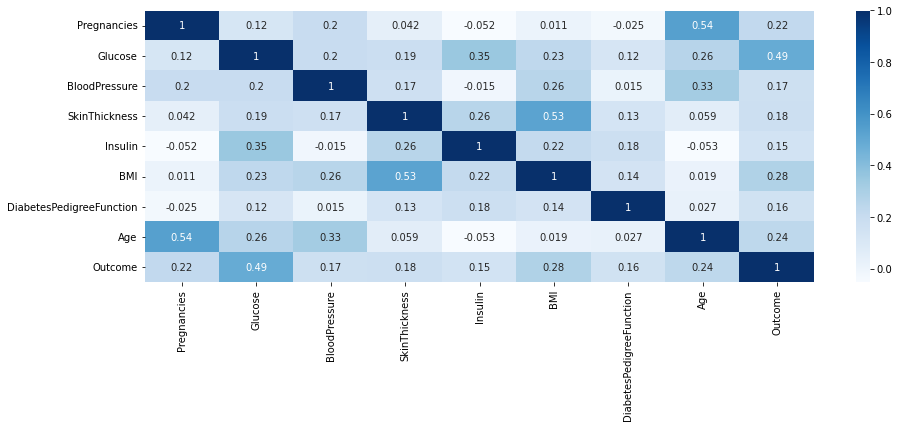

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(data.corr(),cmap='Blues',annot=True)

# Model Building

In [ ]:
# spliting the data
from sklearn.model_selection import train_test_split
 
# feature scaling
from sklearn.preprocessing import StandardScaler


In [ ]:
# split dataset

X=data.iloc[:,0:8]
y=data.iloc[:,8]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.3,stratify=y)

In [ ]:
X_train.shape

(1400, 8)

In [ ]:
y_train.shape

(1400,)

In [ ]:
X_test.shape

(600, 8)

In [ ]:
y_test.shape

(600,)

In [ ]:
# Feature Scaling - standardscaler

sc_X=StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [ ]:
# Model Building 

from sklearn.linear_model import LogisticRegression #Logistic Regression

from sklearn.neighbors import KNeighborsClassifier #KNN

from sklearn.naive_bayes import GaussianNB #Naive-Bayes 

from sklearn.svm import SVC #Support Vector Machine

from sklearn.tree import DecisionTreeClassifier #Decision Tree

from sklearn.ensemble import RandomForestClassifier #Random Forest


In [ ]:
# Testing Model

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
import math

math.sqrt(len(y_train))

37.416573867739416

In [ ]:
# Define Model

lr = LogisticRegression(solver='lbfgs',multi_class='auto') #LogisticRegression

classifier = KNeighborsClassifier(n_neighbors=37, p=2, metric="euclidean") #KNN

nb=GaussianNB() #Naive-Bayes

sv=SVC() #Support Vector MAchine

dt=DecisionTreeClassifier() #Decision Tree

rf=RandomForestClassifier() #Random Forest



In [ ]:
# Fit Model

lr.fit(X_train, y_train)

classifier.fit(X_train, y_train)

nb.fit(X_train, y_train)

sv.fit(X_train, y_train)

dt.fit(X_train, y_train)

rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predict Test Set Result

lr_pred=lr.predict(X_test)

classifier_pred=classifier.predict(X_test)

nb_pred = nb.predict(X_test)

sv_pred = sv.predict(X_test)

dt_pred = dt.predict(X_test)

rf_pred = rf.predict(X_test)

Confusion Matrix For LogisticRegression :
[[356  39]
 [ 95 110]]
F1 Score of Logistic Regression : 0.6214689265536724
Accuracy of Logistic Regression : 0.7766666666666666
Classification Report of Logistic Regression :
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       395
           1       0.74      0.54      0.62       205

    accuracy                           0.78       600
   macro avg       0.76      0.72      0.73       600
weighted avg       0.77      0.78      0.77       600



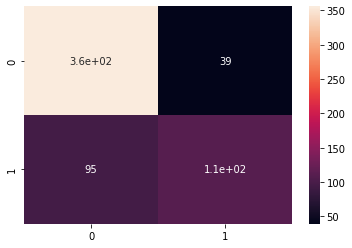

In [ ]:
# Evaluate Model - confusion mtrix - LogisticRegression

print("Confusion Matrix For LogisticRegression :")
cm_logistic=confusion_matrix(y_test,lr_pred)
print(cm_logistic)
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True)
print("F1 Score of Logistic Regression :",f1_score(y_test,lr_pred))
print("Accuracy of Logistic Regression :",accuracy_score(y_test,lr_pred))
print("Classification Report of Logistic Regression :\n",classification_report(y_test, lr_pred))

** Accuracy of Logistic Regression : 78% **

Confusion Matrix For KNN :
[[362  33]
 [ 79 126]]
F1 Score of KNN : 0.6923076923076924
Accuracy of KNN : 0.8133333333333334
Classification Report of KNN :
               precision    recall  f1-score   support

           0       0.82      0.92      0.87       395
           1       0.79      0.61      0.69       205

    accuracy                           0.81       600
   macro avg       0.81      0.77      0.78       600
weighted avg       0.81      0.81      0.81       600



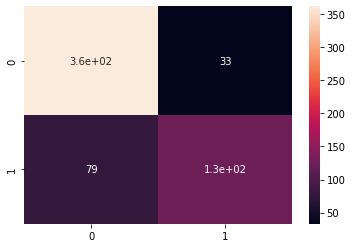

In [ ]:
# Evaluate Model - confusion mtrix - KNN

print("Confusion Matrix For KNN :")
cm_KNN=confusion_matrix(y_test,classifier_pred)
print(cm_KNN)
sns.heatmap(confusion_matrix(y_test,classifier_pred),annot=True)
print("F1 Score of KNN :",f1_score(y_test,classifier_pred))
print("Accuracy of KNN :",accuracy_score(y_test,classifier_pred))
print("Classification Report of KNN :\n",classification_report(y_test, classifier_pred))

** Accuracy of KNN : 81% **

Confusion Matrix For Naive Bayes :
[[321  74]
 [ 90 115]]
F1 Score of Naive Bayes : 0.5837563451776651
Accuracy of Naive Bayes : 0.7266666666666667
Classification Report of Naive Bayes :
               precision    recall  f1-score   support

           0       0.78      0.81      0.80       395
           1       0.61      0.56      0.58       205

    accuracy                           0.73       600
   macro avg       0.69      0.69      0.69       600
weighted avg       0.72      0.73      0.72       600



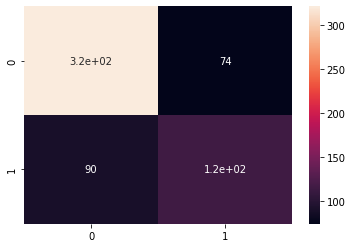

In [ ]:
# Evaluate Model - confusion mtrix - Naive Bayes

print("Confusion Matrix For Naive Bayes :")
cm_NB=confusion_matrix(y_test,nb_pred)
print(cm_NB)
sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True)
print("F1 Score of Naive Bayes :",f1_score(y_test,nb_pred))
print("Accuracy of Naive Bayes :",accuracy_score(y_test,nb_pred))
print("Classification Report of Naive Bayes :\n",classification_report(y_test, nb_pred))

** Accuracy of Naive Bayes : 73% **

Confusion Matrix For Support Vector MAchine :
[[358  37]
 [ 71 134]]
F1 Score of Support Vector MAchine : 0.7127659574468085
Accuracy of Support Vector MAchine : 0.82
Classification Report of Support Vector Machine :
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       395
           1       0.78      0.65      0.71       205

    accuracy                           0.82       600
   macro avg       0.81      0.78      0.79       600
weighted avg       0.82      0.82      0.82       600



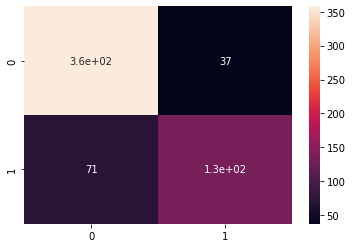

In [ ]:
# Evaluate Model - confusion mtrix - Support Vector MAchine

print("Confusion Matrix For Support Vector MAchine :")
cm_svc=confusion_matrix(y_test,sv_pred)
print(cm_svc)
sns.heatmap(confusion_matrix(y_test,sv_pred),annot=True)
print("F1 Score of Support Vector MAchine :",f1_score(y_test,sv_pred))
print("Accuracy of Support Vector MAchine :",accuracy_score(y_test,sv_pred))
print("Classification Report of Support Vector Machine :\n",classification_report(y_test, sv_pred))

** Accuracy of Support Vector MAchine : 82% **

Confusion Matrix For Decision Tree :
[[366  29]
 [ 21 184]]
F1 Score of Decision Tree : 0.8803827751196173
Accuracy of Decision Tree : 0.9166666666666666
Classification Report of Decision Tree :
               precision    recall  f1-score   support

           0       0.95      0.93      0.94       395
           1       0.86      0.90      0.88       205

    accuracy                           0.92       600
   macro avg       0.90      0.91      0.91       600
weighted avg       0.92      0.92      0.92       600



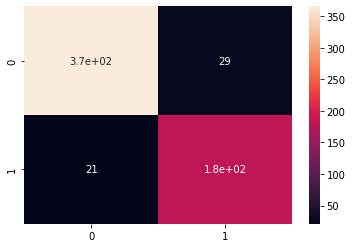

In [ ]:
# Evaluate Model - confusion mtrix - Decision Tree

print("Confusion Matrix For Decision Tree :")
cm_dt=confusion_matrix(y_test,dt_pred)
print(cm_dt)
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True)
print("F1 Score of Decision Tree :",f1_score(y_test,dt_pred))
print("Accuracy of Decision Tree :",accuracy_score(y_test,dt_pred))
print("Classification Report of Decision Tree :\n",classification_report(y_test, dt_pred))

** Accuracy of Decision Tree : 91% **

Confusion Matrix For Random Forest :
[[378  17]
 [ 10 195]]
F1 Score of Random Forest : 0.935251798561151
Accuracy of Random Forest : 0.955
Classification Report of Random Forest :
               precision    recall  f1-score   support

           0       0.97      0.96      0.97       395
           1       0.92      0.95      0.94       205

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.96      0.95      0.96       600



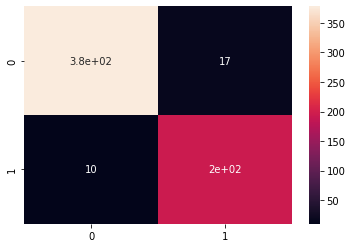

In [ ]:
# Evaluate Model - confusion mtrix - Random Forest

print("Confusion Matrix For Random Forest :")
cm_rf=confusion_matrix(y_test,rf_pred)
print(cm_rf)
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True)
print("F1 Score of Random Forest :",f1_score(y_test,rf_pred))
print("Accuracy of Random Forest :",accuracy_score(y_test,rf_pred))
print("Classification Report of Random Forest :\n",classification_report(y_test, rf_pred))

** Accuracy of Random Forest : 95% **

Recall/Senitivity=TP/TP+FN

We are concerned with Recall as we want minimum False Negative cases. Need to minimize Type 2 Error.

Recall value for Random Forest is higher than other implemented model. Accuracy for RandomForest Classifier: 95%.

# Checking Model

In [ ]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    dpf = float(DiabetesPedigreeFunction)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, dpf, age]] #list
    x = sc_X.transform(x)
    return rf.predict(x)

In [ ]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)
if prediction == True:
     print('Oops! You have diabetes.')
else:
    print("Great! You don't have diabetes.")

Great! You don't have diabetes.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Prediction 2
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)
if prediction == True:
    print('Oops! You have diabetes.')
else:
    print("Great! You don't have diabetes.")

Oops! You have diabetes.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# Prediction 3
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
prediction = predict_diabetes(0,145.0,69.1455,23.0,40.0,44.2,0.630,31)[0]
if prediction:
    print('Oops! You have diabetes.')
else:
    print("Great! You don't have diabetes.")

Oops! You have diabetes.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
